In [1]:
import os 
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import torch
import numpy as np
from tool.model import Unet
from tool.evaluate import *

In [2]:
model = Unet().to('cuda')

In [3]:
inputs = torch.Tensor(np.load('inputs.npy')).to('cuda')
labels = np.load('outputs.npy')

In [4]:
inputs_test = torch.Tensor(np.load('inputs_test.npy')).to('cuda')
labels_test = np.load('outputs_test.npy')

In [5]:
checkpoint = torch.load('model_unet_pi_opt_b3_elr/model_10000.pt')
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

Unet(
  (maxpool): MaxPool3d(kernel_size=(2, 2, 1), stride=(2, 2, 1), padding=0, dilation=1, ceil_mode=False)
  (encoder1): Sequential(
    (0): Conv3d(1, 32, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (1): ReLU()
    (2): Conv3d(32, 64, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (3): ReLU()
  )
  (encoder2): Sequential(
    (0): Conv3d(64, 64, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (1): ReLU()
    (2): Conv3d(64, 128, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (3): ReLU()
  )
  (encoder3): Sequential(
    (0): Conv3d(128, 128, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (1): ReLU()
    (2): Conv3d(128, 256, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (3): ReLU()
  )
  (encoder4): Sequential(
    (0): Conv3d(256, 256, kernel_size=(2, 2, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (1): ReLU()
    (2): Conv3d(256, 512, kernel_size=(3, 3, 1), stride=(1, 1, 1), p

In [6]:
idx = 0

In [7]:
b_norm = 2500

In [8]:
b = model(torch.permute(inputs[idx, ...], (3, 2, 1, 0))[None, ...])*b_norm
b = b.cpu().detach().numpy().squeeze().transpose(2, 1, 0, 3)

B = labels[idx, ...]*b_norm
B = B.transpose(1, 2, 3, 0)

In [9]:
b.shape, B.shape

((513, 257, 50, 3), (513, 257, 50, 3))

In [10]:
b_test = model(torch.permute(inputs_test[idx, ...], (3, 2, 1, 0))[None, ...])*b_norm
b_test = b_test.cpu().detach().numpy().squeeze().transpose(2, 1, 0, 3)

B_test = labels_test[idx, ...]*b_norm
B_test = B_test.transpose(1, 2, 3, 0)

{'c_vec': 0.9899403, 'c_cs': 0.9628073209396166, 'c_cs_ep': 0.8220437496681609, "E_n'": 0.7853229641914368, "E_m'": 0.483060997716947, "E_m'_ep": -280827.3587849, 'eps': 0.9800661}


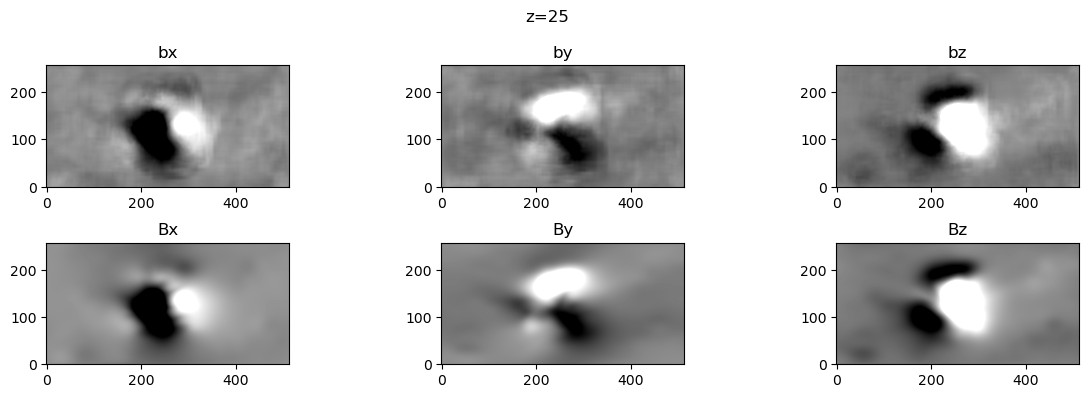

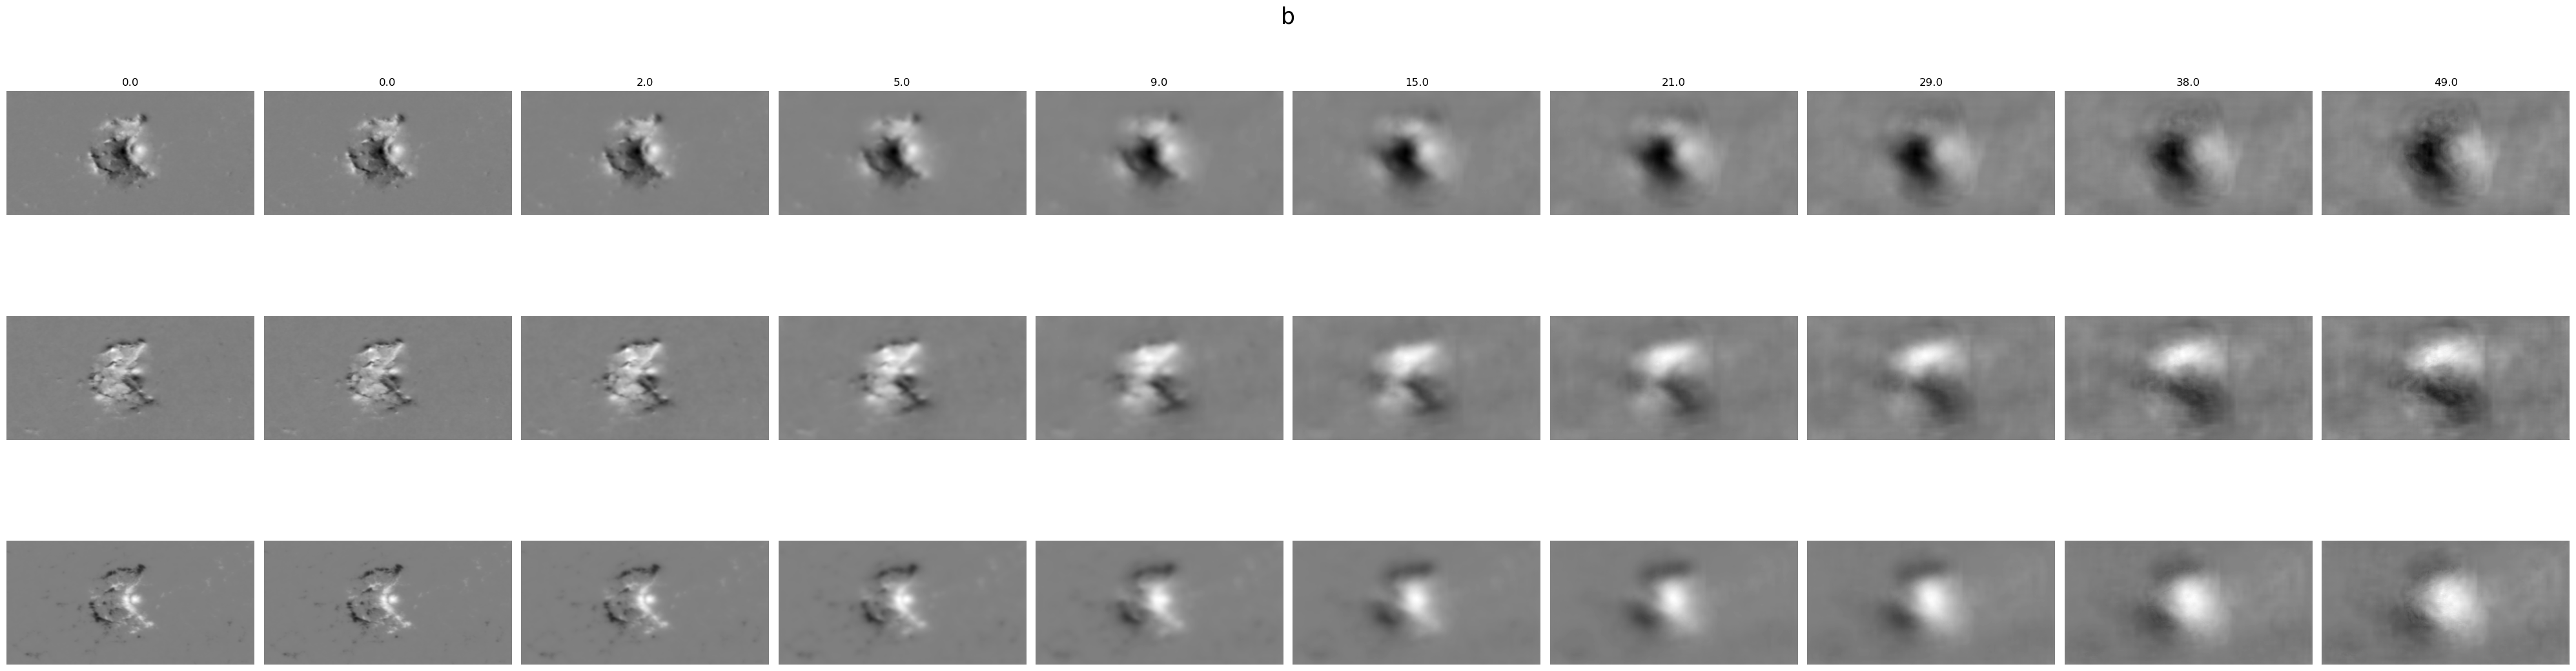

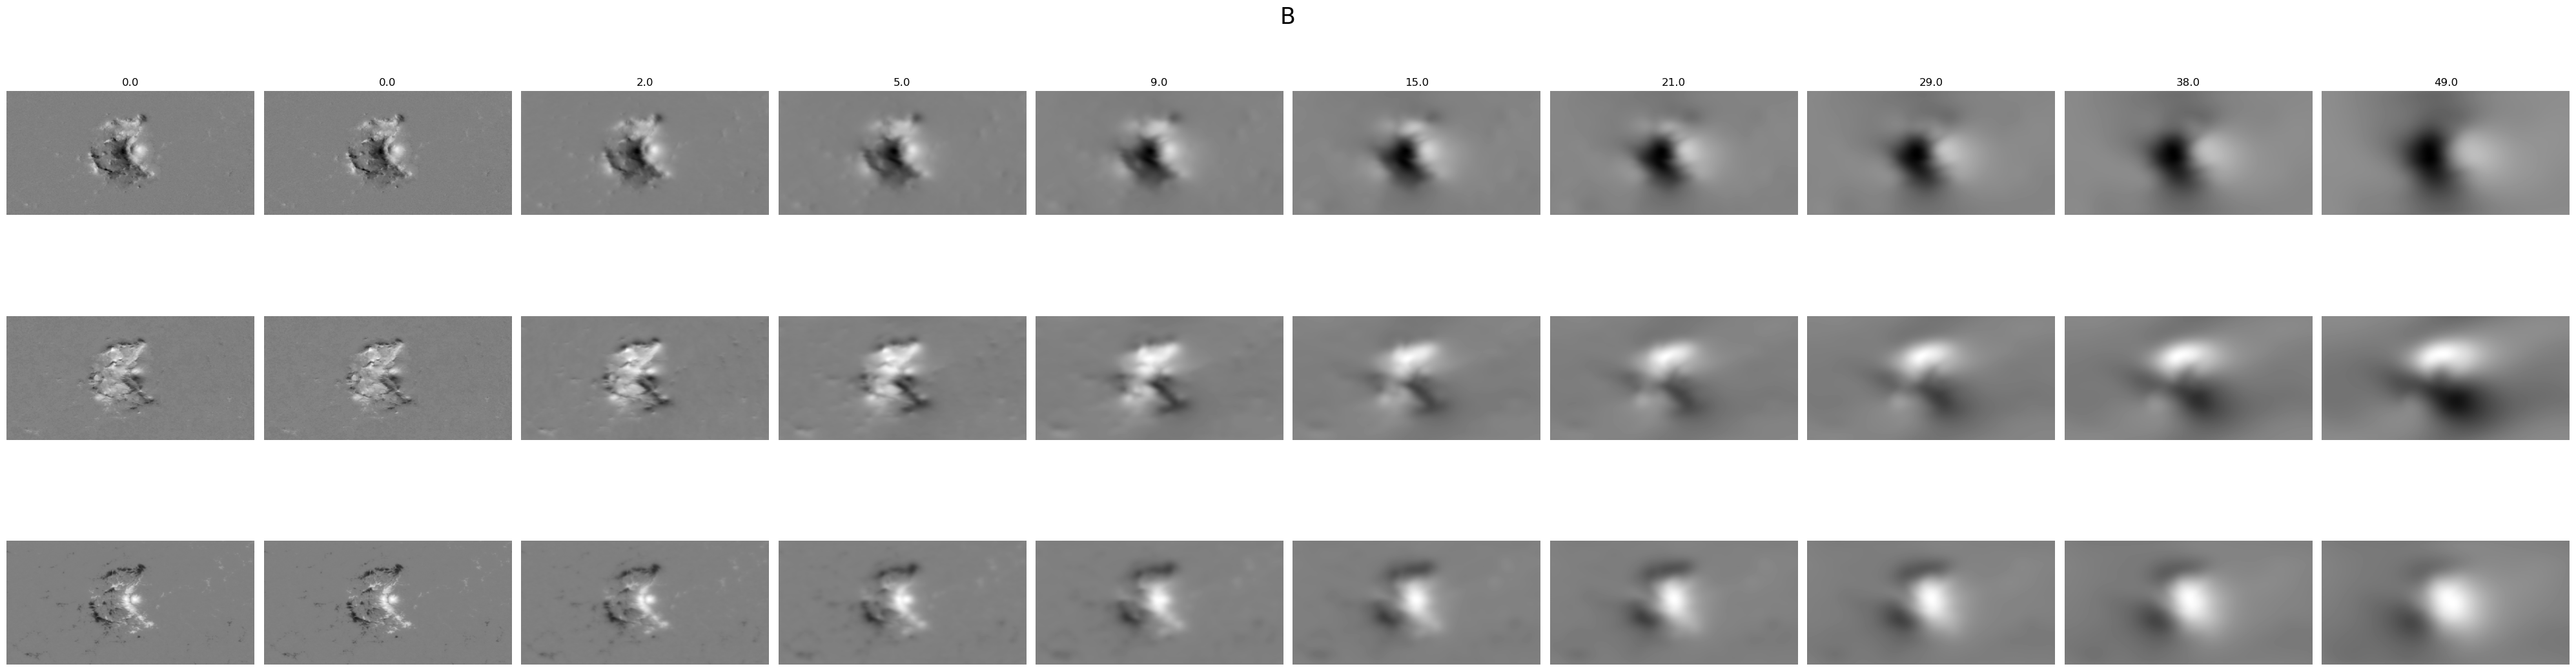

In [11]:
print(metric(b, B))
plot_overview(b, B, z=25, b_norm=100)
plot_sample(b, B)

{'c_vec': 0.90996605, 'c_cs': 9.451523577642766, 'c_cs_ep': 0.5308324800327667, "E_n'": 0.40592360496520996, "E_m'": 0.036031962743001134, "E_m'_ep": -299465.15077737573, 'eps': 1.0216004}


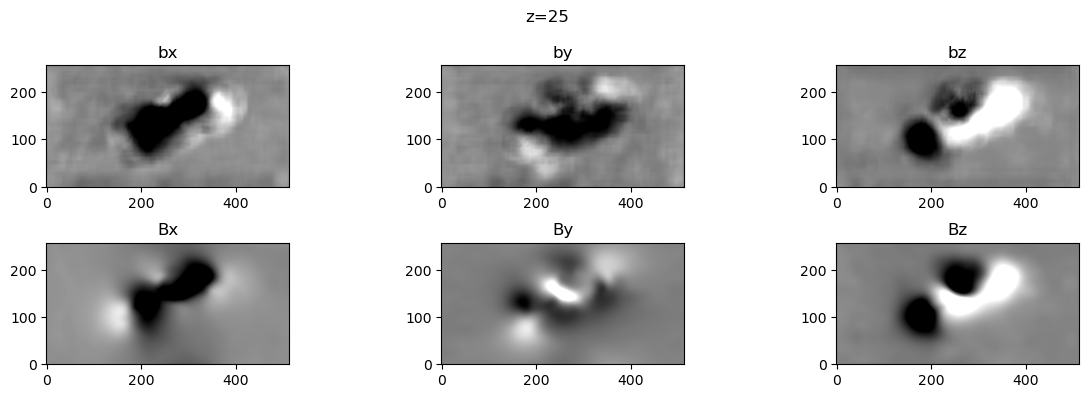

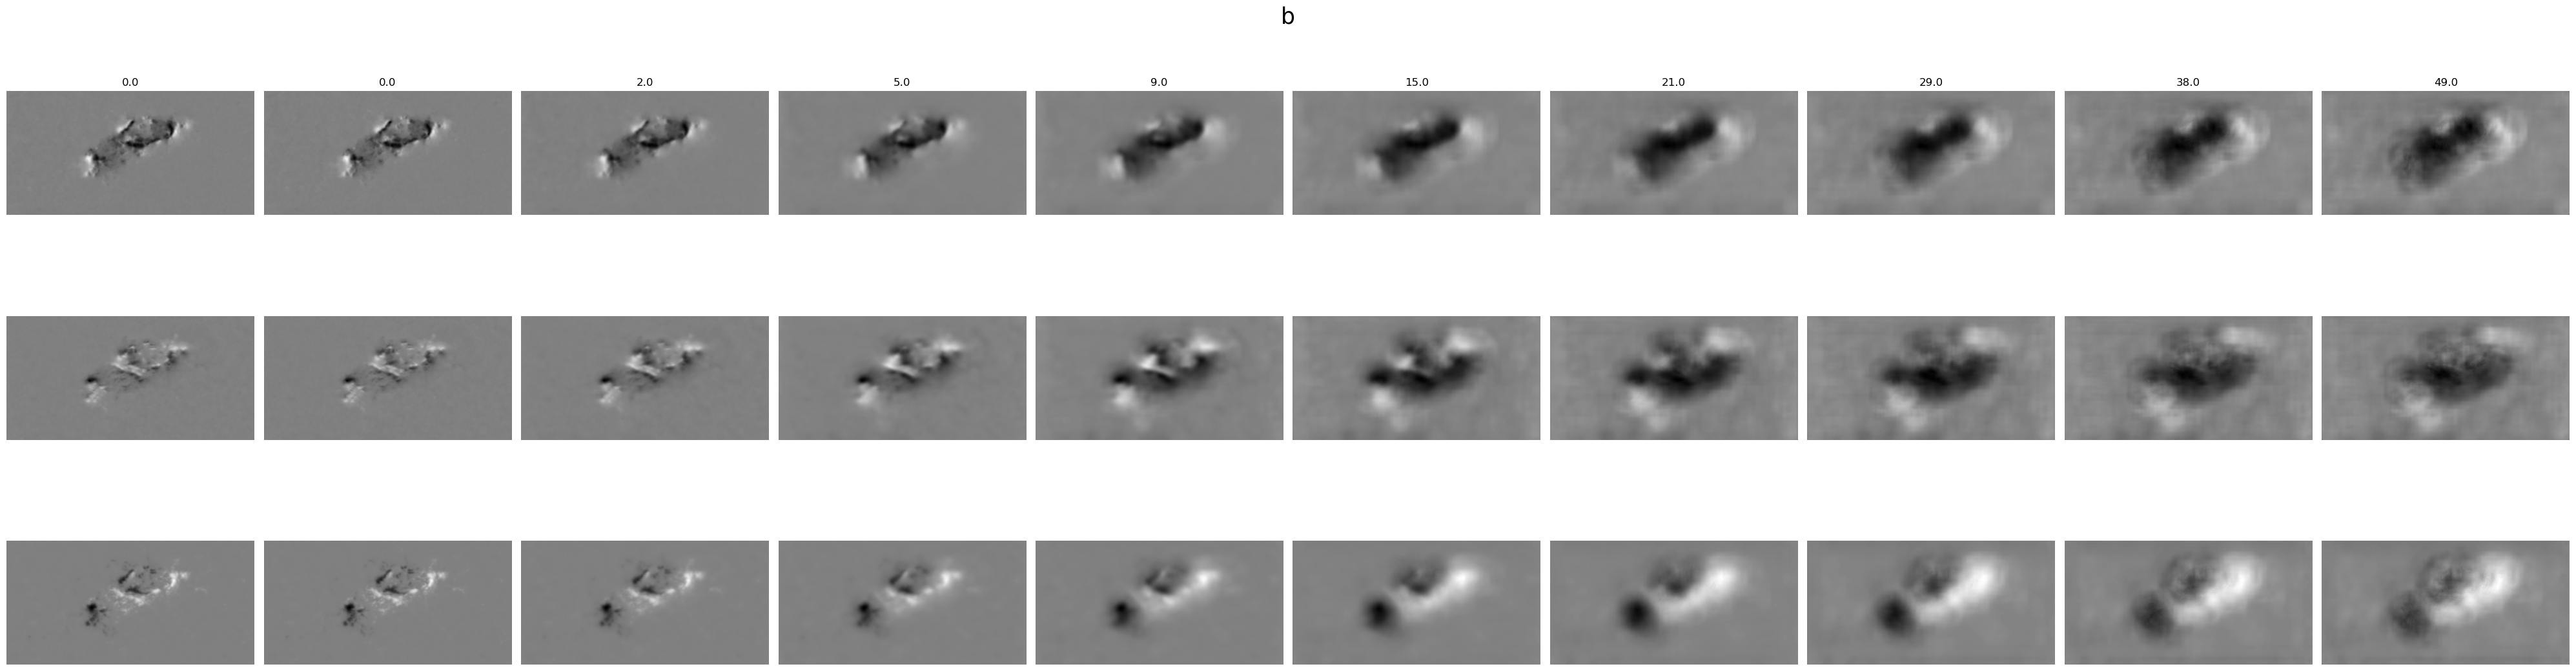

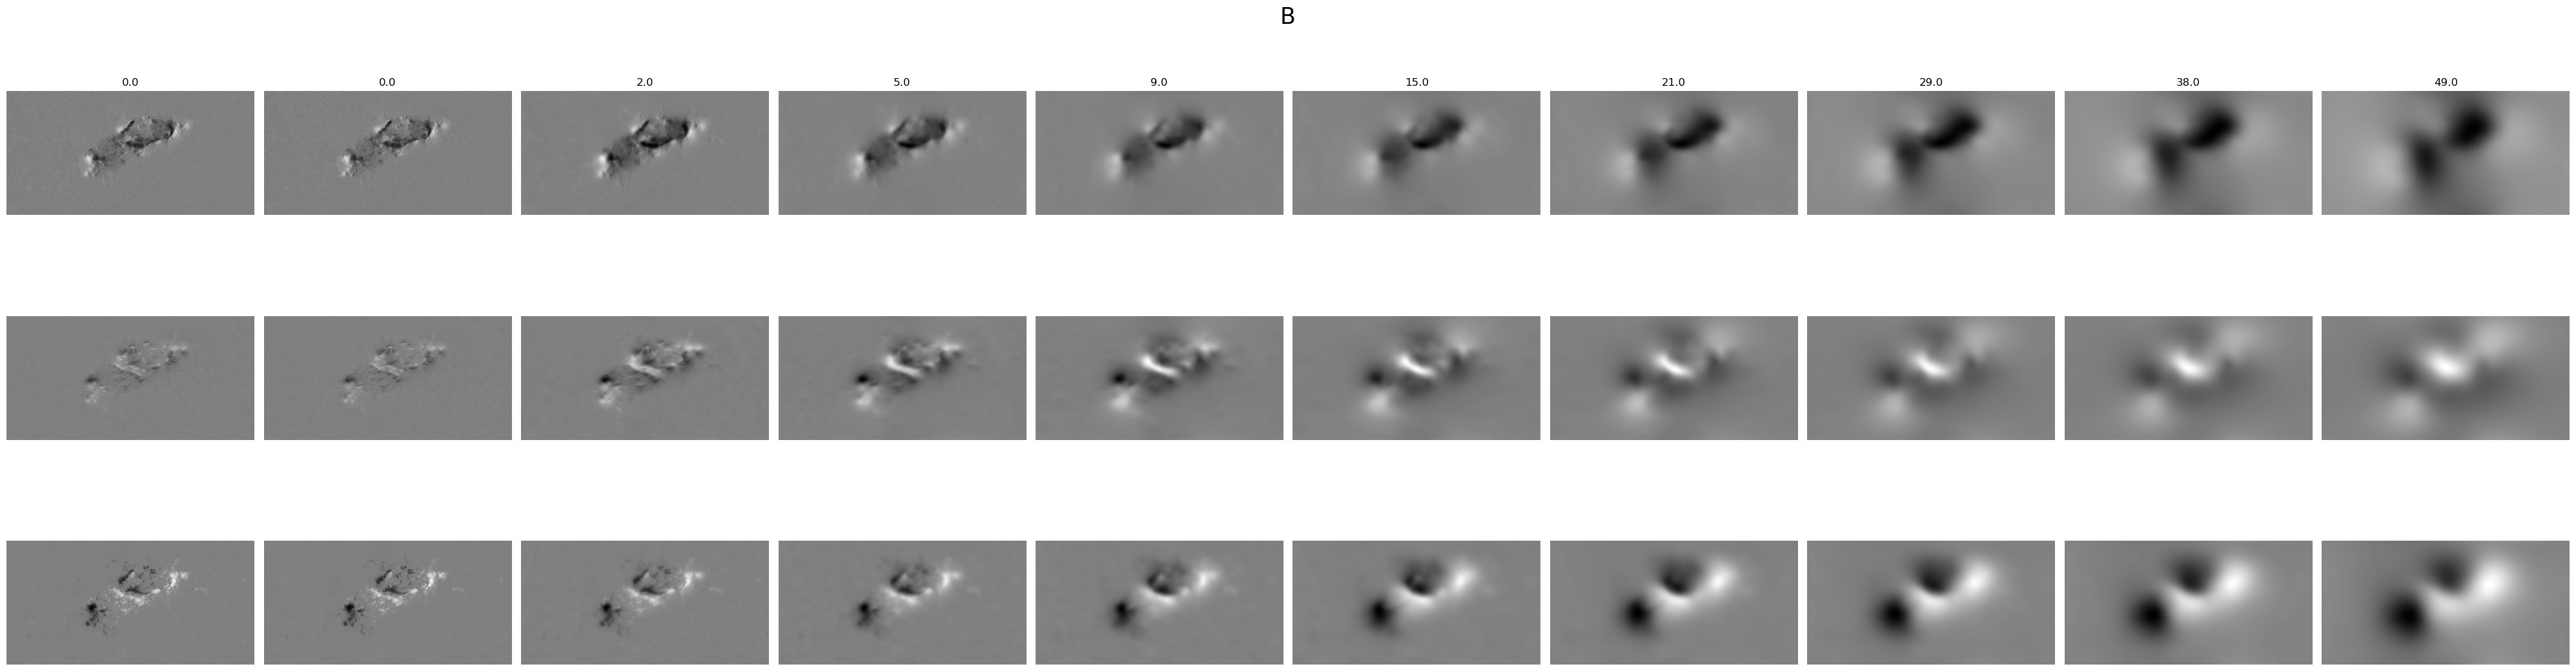

In [12]:
print(metric(b_test, B_test))
plot_overview(b_test, B_test, z=25, b_norm=100)
plot_sample(b_test, B_test)